# Part II - Loan Data from Prosper (Effect of Borrower's features on Loan Amount)

## by (Victoria Edem Effiwatt)

### Investigation Overview
>The goal of my presentation is to highlight the effect(s) of borrower's features on loan original amount(s) that can be received by a borrower from Prosper.
#### Summary of key insights to help notebook to stay aligned to the key insights.
1. Borrowers who are homeowners, whether employed or not employed receive higher loan amounts from Prosper Loans compared to borrowers who are not homeowners. 
2. Loan Term influences the loan amount given out. The loan amount given to borrowers is also influenced by the Prosper score, so borrowers with low risk scores are more likely to receive higher loan amounts. That is because the higher the Loan Term, and the higher the risk score(Prosper Score), the larger the Loan Amount received by borrowers.
3. I also observed from the relationship between loan amount and loan status that majority of borrowers with past due (>120 days) payments took relatively higher amounts of loans, this could be a factor in why they're not timely with payment. 
### Dataset Overview
>The data set is from Prosper and it initially contained 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explained the variables in the data set. I did some data wrangling like changing the data type of some columns, and picking only columns I needed for the exploration I planned to do. After wrangling, the subset of the dataset had 77,543 loan listings and 19 variables. Some variables were numeric and others categorical.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pld = pd.read_csv('ProsperLoanDataClean.csv')

## (Distribution of Loan Original Amount)

> Transformations performed for the distribution of Loan Original amount as one of the key features of interest shows that loan amounts in the dataset are given out in round figures and in multiples of 5,000. These also reveal Tri-modal distribution and the Y-axis log transformation shows right skewness.

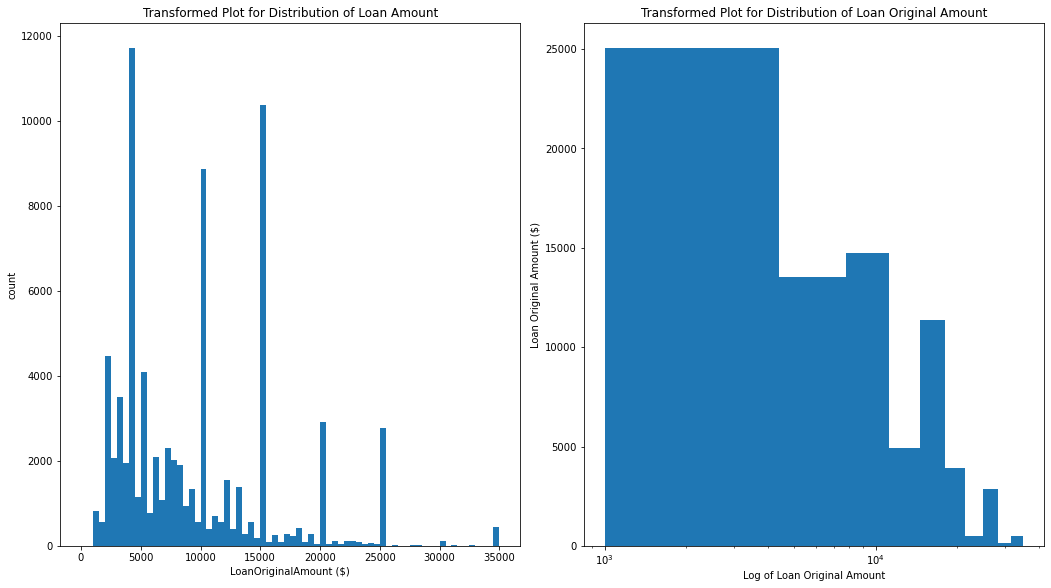

In [3]:
#transformation plots for deeper depiction of distribution
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1, 2, 1)
binsize = 500
bins = np.arange(0, pld['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data=pld, x='LoanOriginalAmount', bins=bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Transformed Plot for Distribution of Loan Amount');

plt.subplot(1, 2, 2)
plt.hist(data=pld, x='LoanOriginalAmount')
plt.xlabel('Log of Loan Original Amount')
plt.ylabel('Loan Original Amount ($)')
plt.title('Transformed Plot for Distribution of Loan Original Amount')
plt.xscale('log')
plt.tight_layout()
plt.show()

## (Distribution of Loan Status)

> The distribution plot shows that more than 50,000 borrowers currently have a loan with Prosper, near 20,000 have completed their loan payments, and the next highests are Chargedoff, Past due(1-15 days), and Defaulted respectively.

In [4]:
pld.LoanStatus = pld.LoanStatus.astype('category')

In [5]:
pld["LoanStatus"] = pld["LoanStatus"].cat.set_categories(['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], ordered=True)

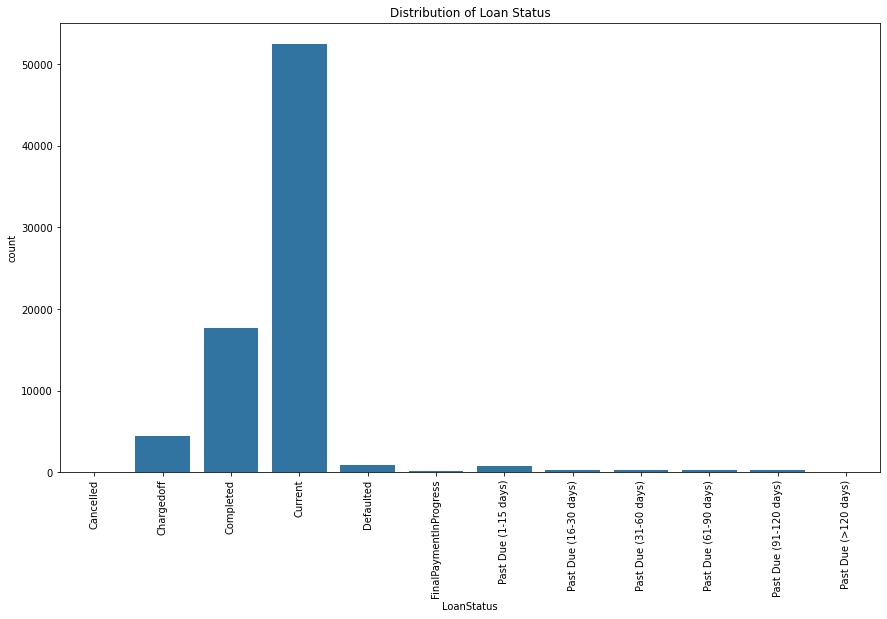

In [6]:
#show distribution of LoanStatus variable.
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=pld,x='LoanStatus',color = sb.color_palette()[0])
plt.title('Distribution of Loan Status')
plt.xticks(rotation=90);

## How does ProsperScore affect Loan Amount received by borrower? 

This visualization highlights the relationship between ProsperScore and LoanOriginalAmount. The Prosper score ranges from 1-10, with 10 being the best, or lowest risk score. The plot shows that as the Prosper Score increases towards the best or lowest risk score, the loan amount increases too. This means the higher the prosper score, the higher the amount of loan amount received. This suggests that borrowers with low risk scores are more likely to get larger loan amounts.

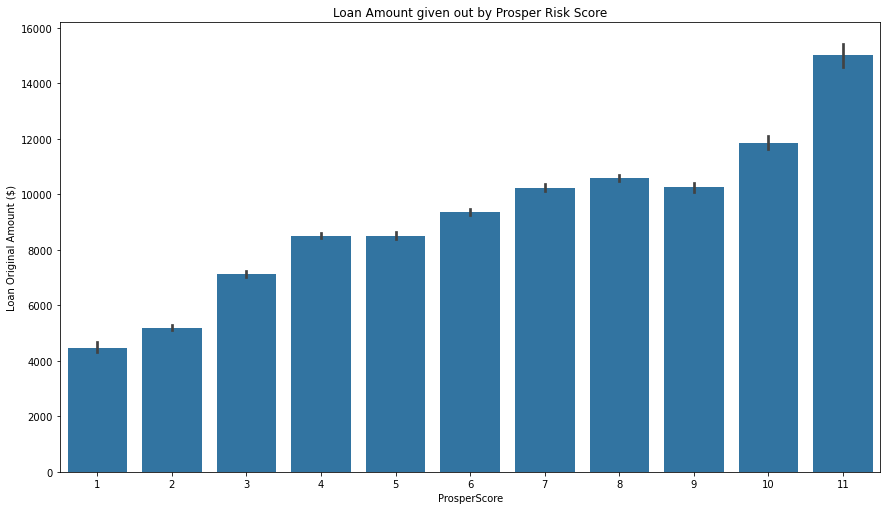

In [7]:
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=pld, x='ProsperScore', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.ylabel('Loan Original Amount ($)');
plt.title('Loan Amount given out by Prosper Risk Score');

## How does Homeownership affect Loan Amount received by borrower? 

This visualization highlights the relationship between IsBorrowerHomeowner and LoanOriginalAmount. Being a homeowner definitely affects the original loan amount received as a borrower because the plots reveal that Homeowners receive higher average loan original amounts compared to none home-owners.

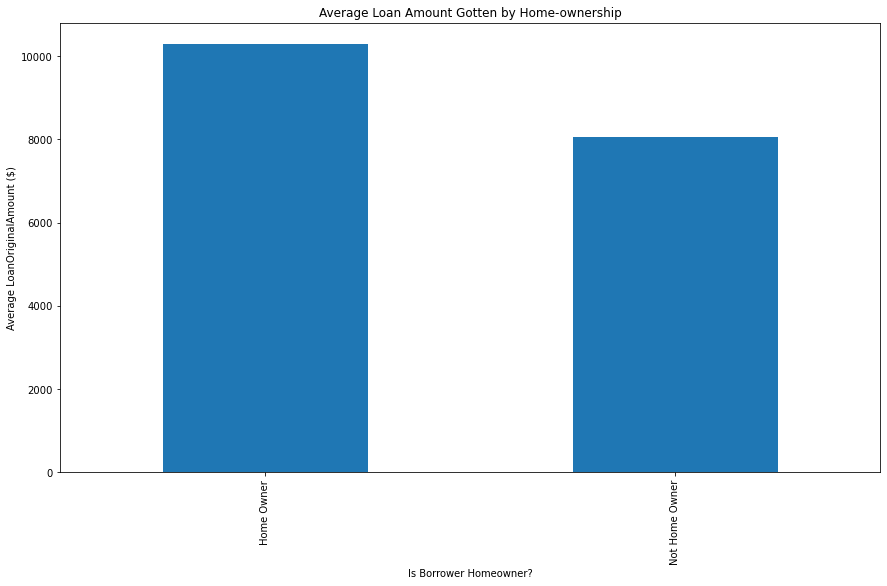

In [8]:
#Plot average Loan Amount by Home-ownership
data=pld.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']
#Create a plot as the variable "ax"
ax = data.plot(kind='bar',
               title="Average Loan Amount Gotten by Home-ownership",
               figsize=(14.70, 8.27), color=sb.color_palette()[0])
#Set axis labels for the "ax" plot
ax.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

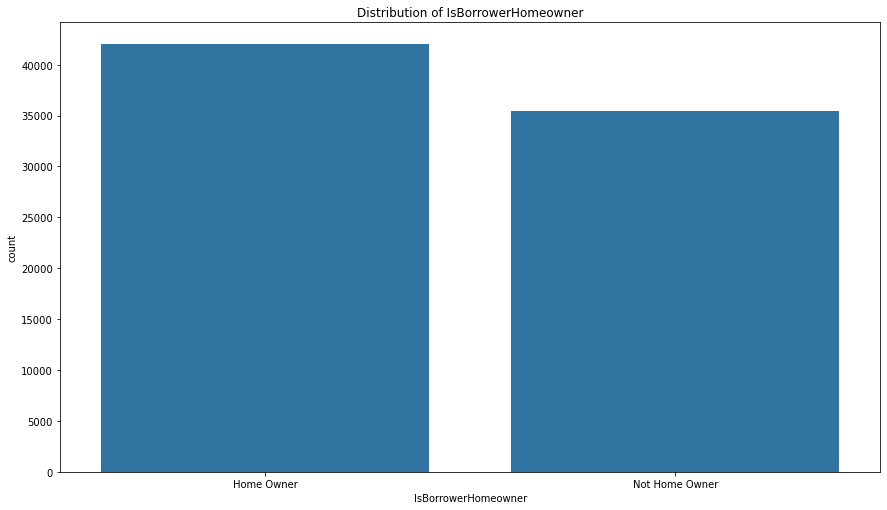

In [9]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=pld, x='IsBorrowerHomeowner', order=pld['IsBorrowerHomeowner'].value_counts().index, 
             color=sb.color_palette()[0])
plt.title('Distribution of IsBorrowerHomeowner');

## How does Employment Status affect Loan Amount received by borrower? 

This visualization highlights the relationship between EmploymentStatus and LoanOriginalAmount, it reveals that majority of borrowers who received the highest loan original amounts are employed. 

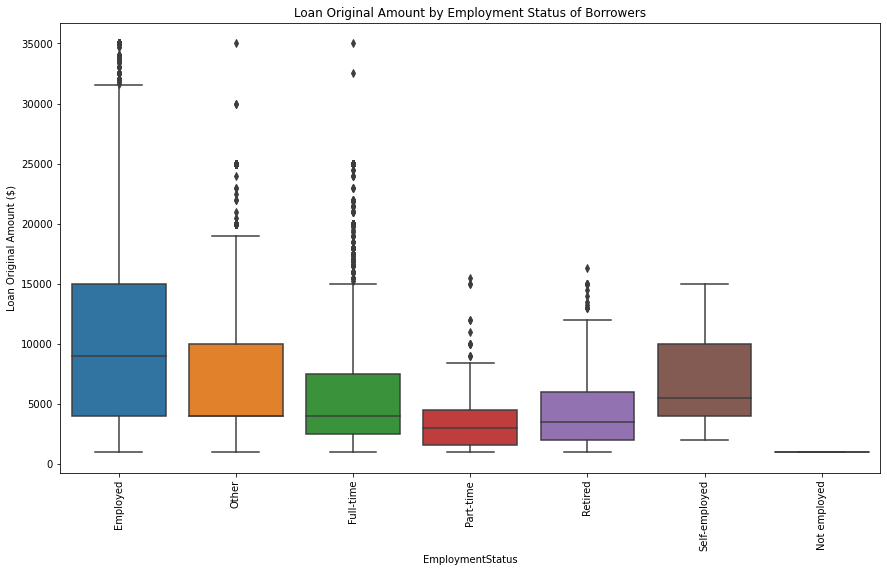

In [10]:
plt.figure(figsize=[14.70, 8.27])

sb.boxplot(data=pld,x='EmploymentStatus', y='LoanOriginalAmount')
plt.xticks(rotation=15)
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Employment Status of Borrowers')
plt.xticks(rotation=90);

##  Does Loan Amount taken influence Loan Status? 

Here, I explore the relationship between Loan Original Amount and Loan Status to answer the question of if loan amount taken by a borrower affects the loan status. The plot reveals that borrowers with current loans have the highest amount of loans. Majority of borrowers with past due(>120 days) payments took relatively higher amounts of loans, this could be a factor in why they're not timely with payment. 

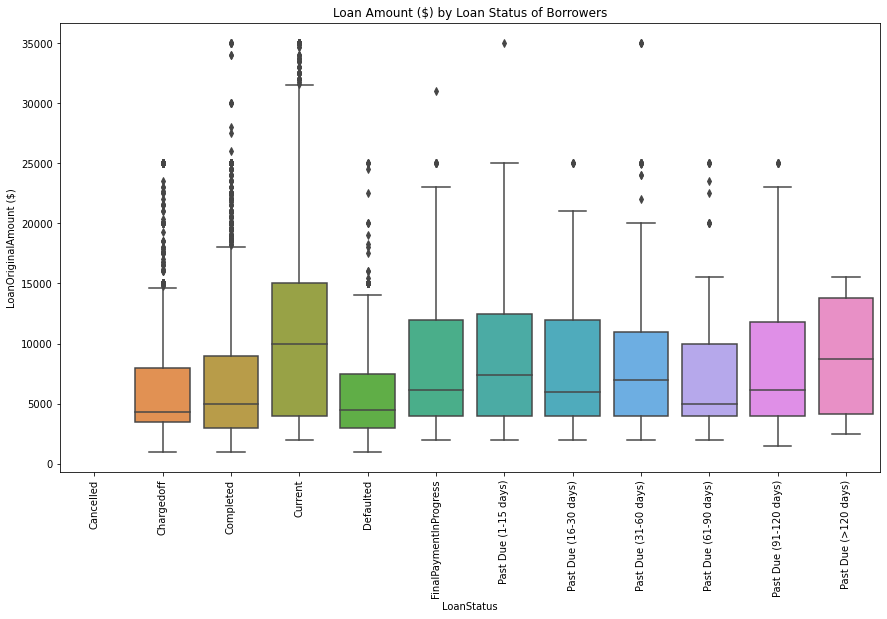

In [11]:
plt.figure(figsize=[14.70, 8.27])

sb.boxplot(data=pld,x='LoanStatus', y='LoanOriginalAmount')
plt.xticks(rotation=15)
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount ($) by Loan Status of Borrowers')
plt.xticks(rotation=90);

## How does employment status and being a Homeowner affect the Loan Original Amount? 

For this visualization, I explore the relationship between EmploymentStatus, LoanOriginalAmount and IsBorroweraHomeOwner. From the plot, it can be seen that borrowers who are homeowners receive higher amount of loans compared to borrowers who are not homeowners. However, it is interesting to notice that borrowers who are homeowners and not employed still receive loan amounts, even though small. Borrowers who are not homeowners and also not employed, do not receive any loans.

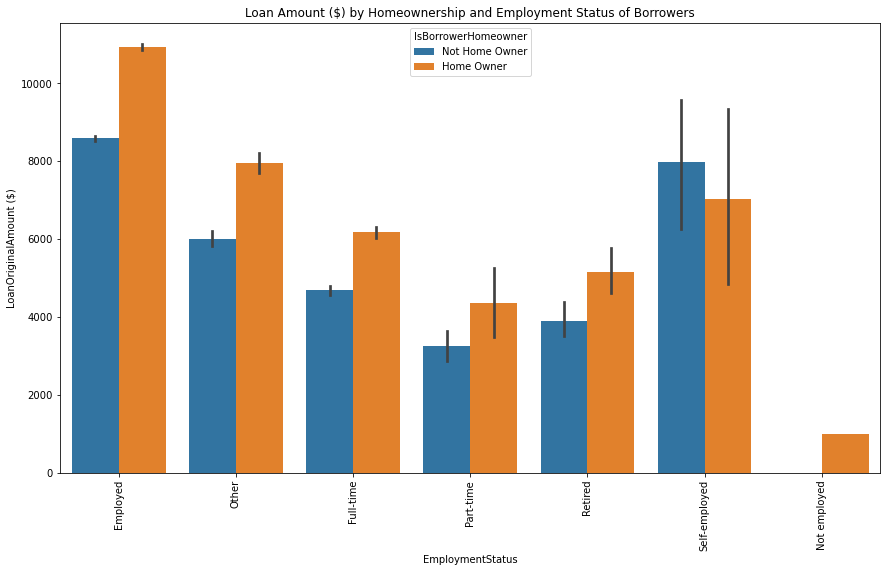

In [12]:
plt.figure(figsize=[14.70, 8.27])
sb.barplot(data=pld, x='EmploymentStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount ($)')
plt.title('Loan Amount ($) by Homeownership and Employment Status of Borrowers')
plt.xticks(rotation=90);

## How does Loan Term and Prosper score affect the Loan Amount? 

Exploring the relationship between LoanTerm, ProsperScore, and LoanOriginalAmount, reveals that Loan Term influences the amount of loan to be given out. The loan amount given to borrowers is also influenced by the Prosper score (risk score). So a higher Loan Term(in months) and a high Prosper score (less risk) say 10 or 11, will result in a borrower being more likely to get a high loan amount.

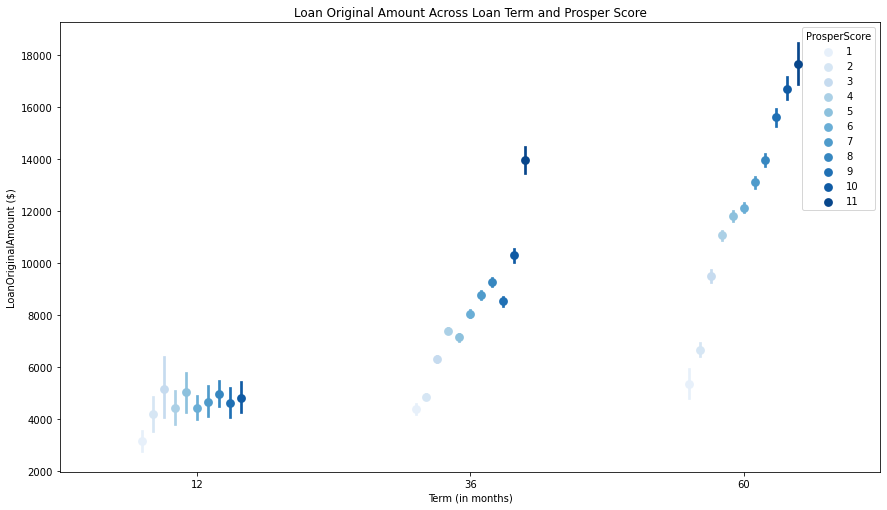

In [13]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.pointplot(data=pld, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show();

In [ ]:
!jupyter nbconvert Part_2_Loan_Data.ipynb --to slides --post serve --no-input --no-prompt